In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_tiki = pd.read_csv('tiki_trans.csv', index_col=0)
df_shopee = pd.read_csv('shopee_trans.csv', index_col=0)
df_sendo = pd.read_csv('sendo_trans.csv', index_col=0)
df_lazada = pd.read_csv('lazada_trans.csv', index_col=0)
df_tgdd = pd.read_csv('tgdd_trans.csv', index_col=0)

In [3]:
df_ecom = pd.concat([df_tiki, df_shopee, df_sendo, df_lazada, df_tgdd], axis=1, join='inner')
df_ecom.columns = ['Tiki', 'Shopee', 'Sendo', 'Lazada', 'TGDD']
df_ecom.index = pd.to_datetime(df_ecom.index)
df_ecom = df_ecom.resample('D').mean()
df_ecom

,Tiki,Shopee,Sendo,Lazada,TGDD
2016-12-01,39208,2716,137639,219945,575176
2016-12-02,45395,2259,188124,151591,416605
2016-12-03,26332,2506,91043,176054,552117
2016-12-04,40805,2443,175948,239613,570132
2016-12-05,33590,2646,112874,259489,330156
...,...,...,...,...,...
2021-09-26,194681,1111591,139008,253059,1499709
2021-09-27,208145,1221512,137086,232647,1041605
2021-09-28,263037,1095496,108677,257854,1256190
2021-09-29,177575,1064121,121347,154003,1120203


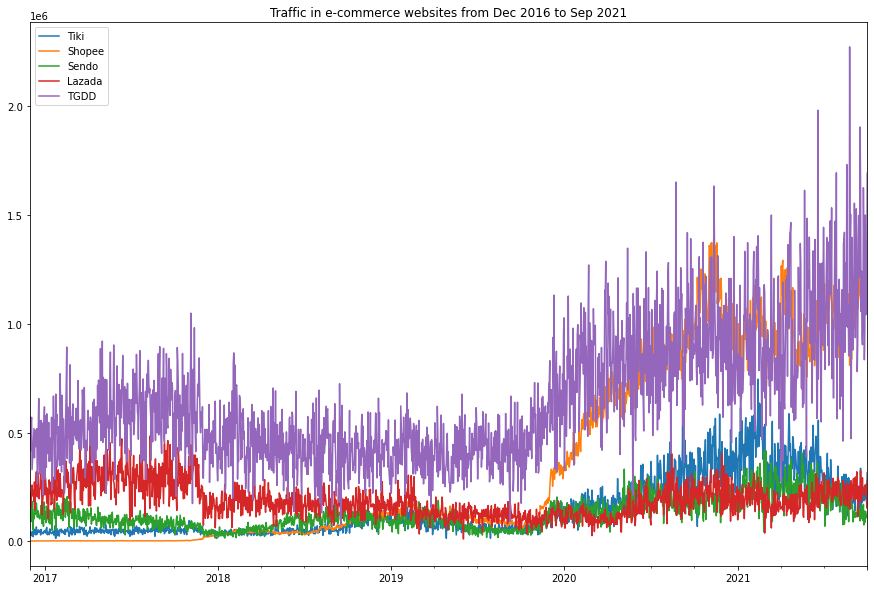

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 10)
df_ecom.plot()
plt.title('Traffic in e-commerce websites from Dec 2016 to Sep 2021')
plt.show()

In [5]:
df_ecom['Total'] = df_ecom.sum(axis=1)

In [6]:
df_ecom

,Tiki,Shopee,Sendo,Lazada,TGDD,Total
2016-12-01,39208,2716,137639,219945,575176,974684
2016-12-02,45395,2259,188124,151591,416605,803974
2016-12-03,26332,2506,91043,176054,552117,848052
2016-12-04,40805,2443,175948,239613,570132,1028941
2016-12-05,33590,2646,112874,259489,330156,738755
...,...,...,...,...,...,...
2021-09-26,194681,1111591,139008,253059,1499709,3198048
2021-09-27,208145,1221512,137086,232647,1041605,2840995
2021-09-28,263037,1095496,108677,257854,1256190,2981254
2021-09-29,177575,1064121,121347,154003,1120203,2637249


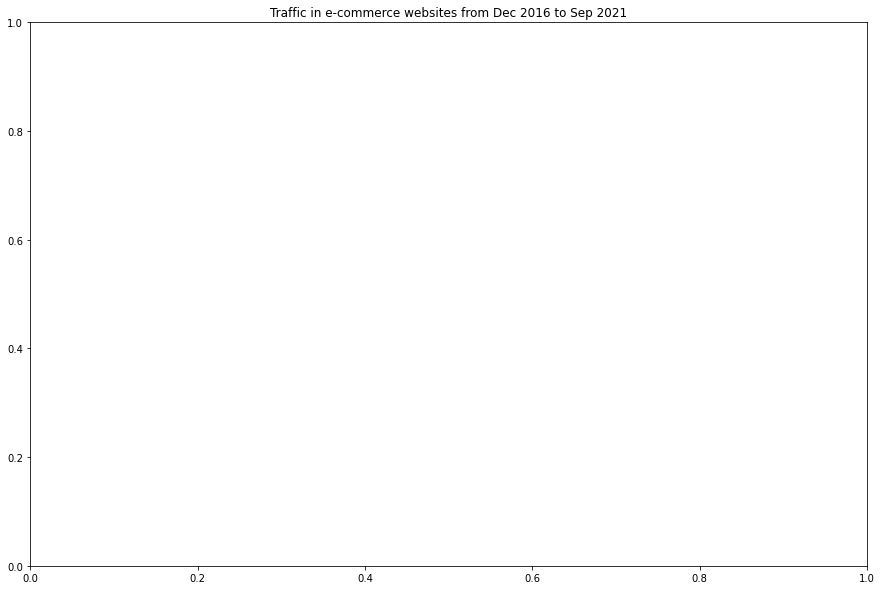

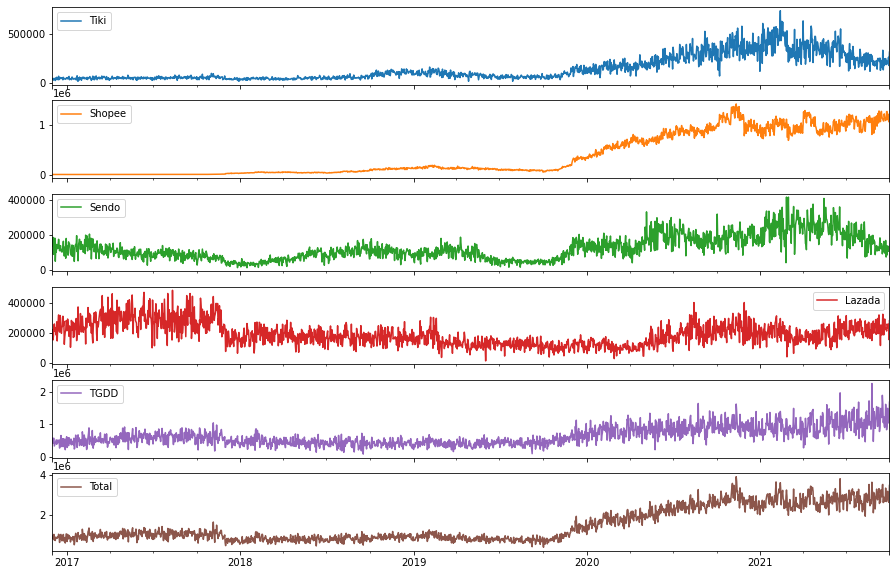

In [7]:
plt.title('Traffic in e-commerce websites from Dec 2016 to Sep 2021')
df_ecom.plot(subplots=True)
plt.show()

In [8]:
df_ecom.describe()

,Tiki,Shopee,Sendo,Lazada,TGDD,Total
count,1765.000000,1.765000e+03,1765.000000,1765.000000,1.765000e+03,1.765000e+03
mean,143674.422663,3.647928e+05,125678.257790,189663.146176,6.413586e+05,1.465167e+06
std,130591.433636,4.215628e+05,69143.274987,77028.632926,2.933419e+05,8.365581e+05
min,13922.000000,1.820000e+03,15641.000000,11469.000000,7.933000e+04,3.794570e+05
25%,49925.000000,3.675600e+04,74760.000000,131248.000000,4.225660e+05,8.198600e+05
50%,79036.000000,1.161370e+05,111691.000000,177473.000000,5.665490e+05,1.034575e+06
75%,212314.000000,8.097250e+05,161727.000000,236250.000000,8.117140e+05,2.258074e+06
max,745747.000000,1.425594e+06,416150.000000,485306.000000,2.271648e+06,3.936391e+06


## Using Least-Squared Method to define secular trend

Can only be done with the assumption that the data has only LINEAR trend component.

In [9]:
X = np.arange(len(df_ecom))
y = df_ecom['Tiki']

mean_X = X.mean()
mean_y = y.mean()
        
Sxy = np.sum((X - mean_X) * (y - mean_y), axis=0)
Sxx = np.sum(np.power(X - mean_X, 2), axis=0)

slope = Sxy / Sxx
intercept = mean_y - slope * mean_X

slope, intercept

(199.91715682535434, -32652.50965707301)

In [10]:
def least_squared(X, y):
    mean_X = X.mean()
    mean_y = y.mean()

    Sxy = np.sum((X - mean_X) * (y - mean_y), axis=0)
    Sxx = np.sum(np.power(X - mean_X, 2), axis=0)

    slope = Sxy / Sxx
    intercept = mean_y - slope * mean_X
    
    print(slope, intercept)
    
    mpl.rcParams['figure.figsize'] = (15, 4)
    plt.plot(X, y, label='Actual Data')
    plt.plot(X, slope * X + intercept, label='Trend Line')
    plt.show()

199.91715682535434 -32652.50965707301


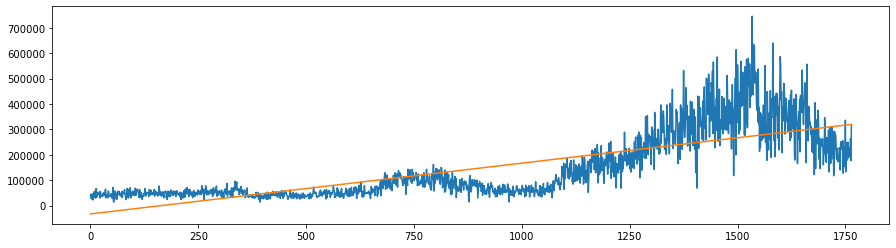

733.5947106567772 -282237.71836868266


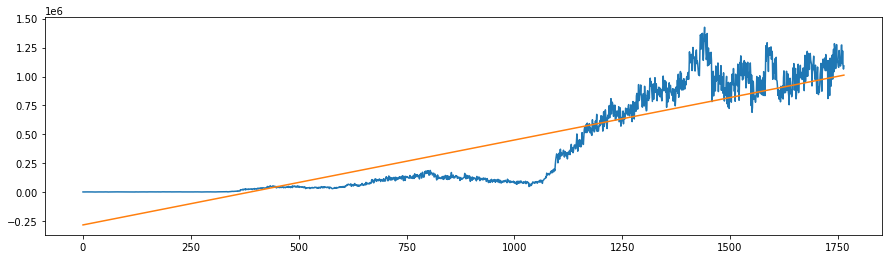

-46.36253450122265 230554.90160571577


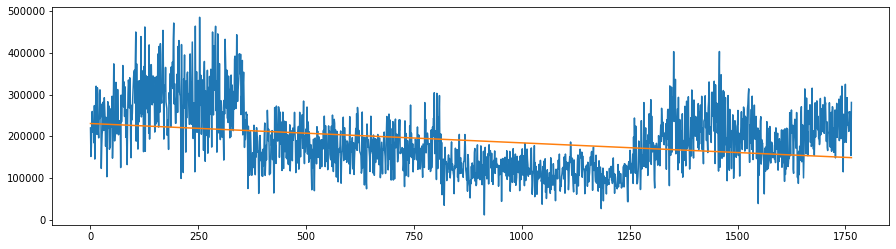

80.66813579287518 54528.96202105236


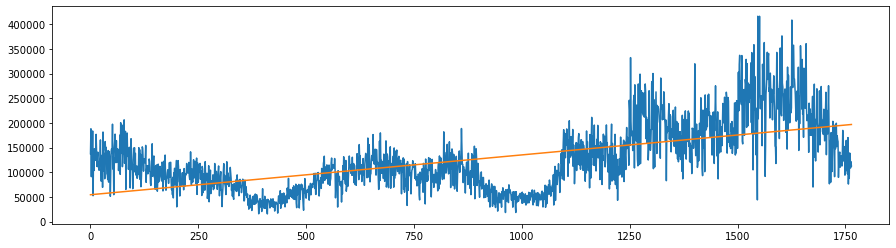

347.6129650327884 334763.9263141685


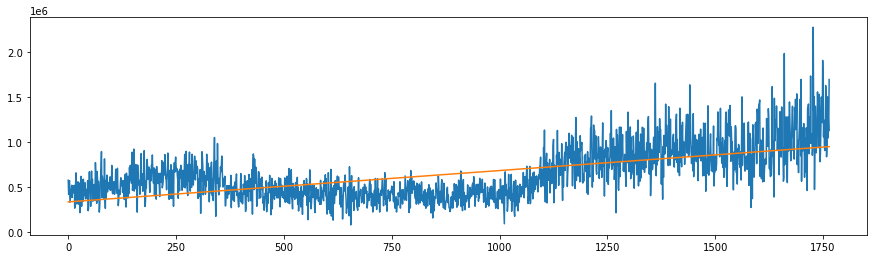

1315.4304338065724 304957.5619151811


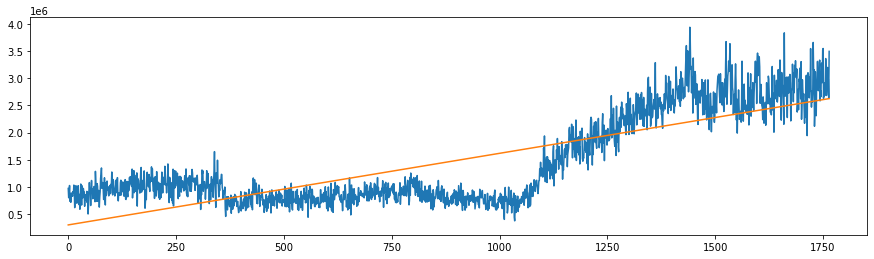

In [11]:
least_squared(np.arange(len(df_ecom)), df_ecom['Tiki'])
least_squared(np.arange(len(df_ecom)), df_ecom['Shopee'])
least_squared(np.arange(len(df_ecom)), df_ecom['Lazada'])
least_squared(np.arange(len(df_ecom)), df_ecom['Sendo'])
least_squared(np.arange(len(df_ecom)), df_ecom['TGDD'])
least_squared(np.arange(len(df_ecom)), df_ecom['Total'])

245.8801549369361 208575.11476917058


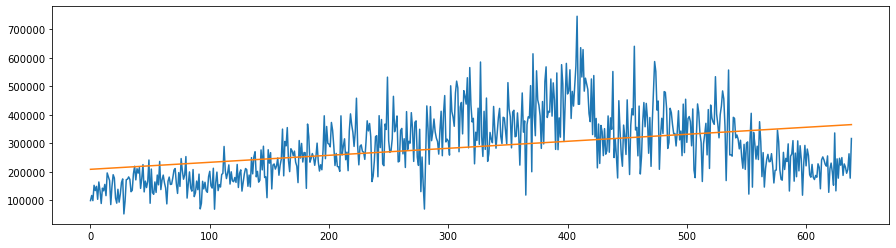

895.4692944040944 604782.0071351721


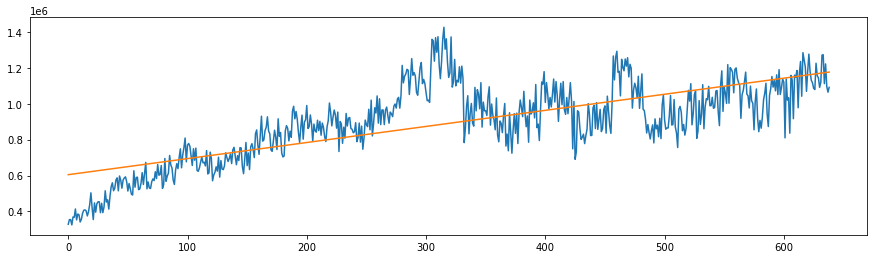

167.01707410739252 130145.03536287168


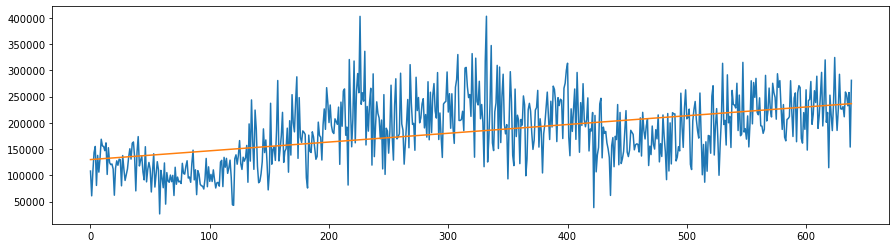

110.44121981102919 156073.42771909235


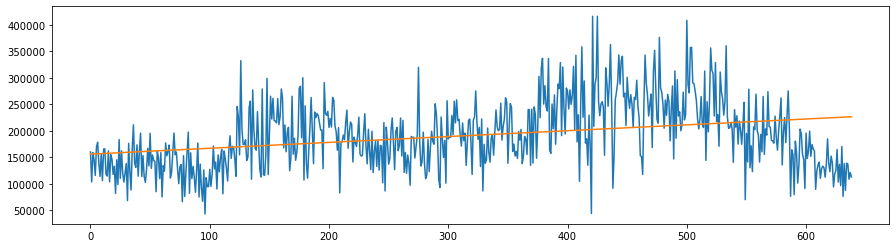

545.1727368849986 751325.7435690532


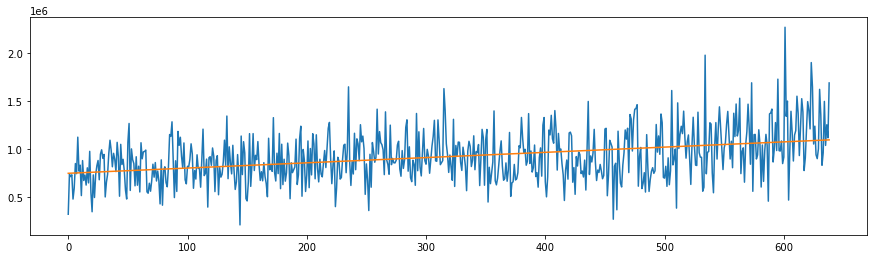

1963.980480144451 1850901.32855536


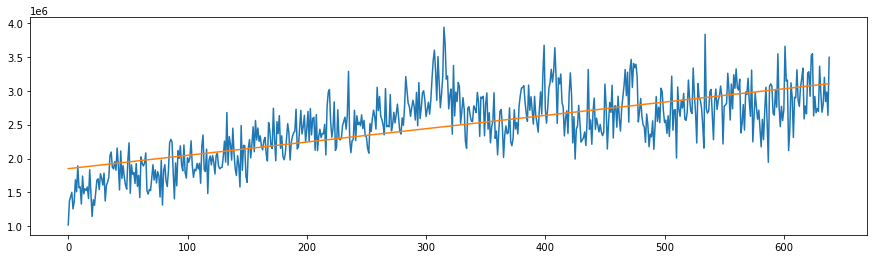

In [12]:
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['Tiki'])
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['Shopee'])
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['Lazada'])
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['Sendo'])
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['TGDD'])
least_squared(np.arange(len(df_ecom['2020':])), df_ecom['2020':]['Total'])

## Considering seasonal aspects

Each part will consider 2 segments of data, before 2020 and overall.

1. Percentage of traffic grouped by days of the week

In [13]:
df_ecom['day_of_week'] = df_ecom.index.day_of_week
df_ecom

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week
2016-12-01,39208,2716,137639,219945,575176,974684,3
2016-12-02,45395,2259,188124,151591,416605,803974,4
2016-12-03,26332,2506,91043,176054,552117,848052,5
2016-12-04,40805,2443,175948,239613,570132,1028941,6
2016-12-05,33590,2646,112874,259489,330156,738755,0
...,...,...,...,...,...,...,...
2021-09-26,194681,1111591,139008,253059,1499709,3198048,6
2021-09-27,208145,1221512,137086,232647,1041605,2840995,0
2021-09-28,263037,1095496,108677,257854,1256190,2981254,1
2021-09-29,177575,1064121,121347,154003,1120203,2637249,2


In [14]:
df_ecom.groupby('day_of_week').mean()

,Tiki,Shopee,Sendo,Lazada,TGDD,Total
day_of_week,,,,,,
0,143004.246032,363761.964286,125746.357143,187827.496032,629010.813492,1.449351e+06
1,139870.464286,359347.353175,121085.083333,192708.273810,644922.801587,1.457934e+06
2,145790.115079,369536.551587,123385.083333,192634.404762,652570.011905,1.483916e+06
3,140310.110672,368120.857708,131225.229249,185645.529644,655579.300395,1.480881e+06
4,145447.444444,372941.142857,126748.769841,190947.373016,645684.003968,1.481769e+06
5,146379.789683,356367.142857,127461.138889,190178.091270,632735.833333,1.453122e+06
6,144932.138889,363461.496032,124074.130952,187716.797619,628950.734127,1.449135e+06


In [15]:
df_ecom.groupby('day_of_week').mean() / df_ecom.groupby('day_of_week').mean().sum(axis=0) * 100

,Tiki,Shopee,Sendo,Lazada,TGDD,Total
day_of_week,,,,,,
0,14.218889,14.245419,14.293813,14.147280,14.010855,14.131587
1,13.907298,14.072536,13.763957,14.514904,14.365285,14.215275
2,14.495888,14.471559,14.025403,14.509340,14.535622,14.468609
3,13.951012,14.416119,14.916606,13.982933,14.602653,14.439015
4,14.461816,14.604888,14.407759,14.382271,14.382241,14.447671
5,14.554519,13.955827,14.488735,14.324329,14.093828,14.168357
6,14.410579,14.233652,14.103728,14.138943,14.009517,14.129485


2. Percentage of traffic grouped by days of the week

In [16]:
df_ecom['day'] = df_ecom.index.day
df_ecom

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week,day
2016-12-01,39208,2716,137639,219945,575176,974684,3,1
2016-12-02,45395,2259,188124,151591,416605,803974,4,2
2016-12-03,26332,2506,91043,176054,552117,848052,5,3
2016-12-04,40805,2443,175948,239613,570132,1028941,6,4
2016-12-05,33590,2646,112874,259489,330156,738755,0,5
...,...,...,...,...,...,...,...,...
2021-09-26,194681,1111591,139008,253059,1499709,3198048,6,26
2021-09-27,208145,1221512,137086,232647,1041605,2840995,0,27
2021-09-28,263037,1095496,108677,257854,1256190,2981254,1,28
2021-09-29,177575,1064121,121347,154003,1120203,2637249,2,29


,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week
day,,,,,,,
1,3.122901,3.077925,3.123580,3.083975,2.978392,3.043440,3.300798
2,3.038686,3.064336,3.290053,3.053664,3.199250,3.138893,3.208079
3,3.042321,3.142121,3.207407,3.148366,3.287520,3.202428,3.245167
4,3.141956,3.113550,3.199739,3.085284,3.206236,3.160666,3.282254
5,3.032953,3.176172,3.315634,3.157435,3.208152,3.185678,3.189535
6,3.193697,3.235853,3.349649,3.294736,3.136359,3.205524,3.096816
7,3.073230,3.241120,3.100044,3.126024,3.214035,3.185806,3.263711
8,3.324572,3.218747,3.170646,3.178090,3.174946,3.200551,3.300798
9,3.344945,3.280631,3.178564,3.314851,3.181322,3.239112,3.208079


<AxesSubplot:xlabel='day'>

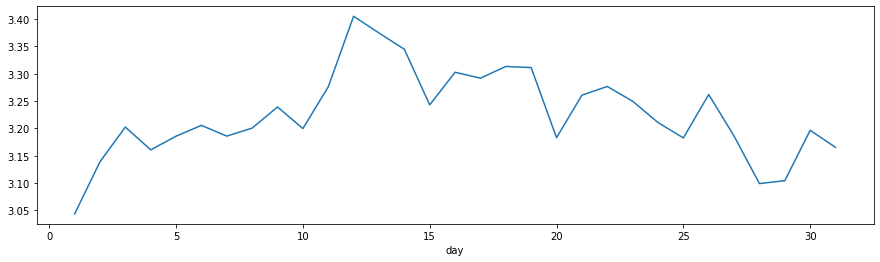

In [17]:
display(df_ecom.groupby('day').mean() / df_ecom.groupby('day').mean().sum(axis=0) * 100)
(df_ecom.groupby('day').mean() / df_ecom.groupby('day').mean().sum(axis=0) * 100)['Total'].plot()

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week
day,,,,,,,
1,3.247853,3.194972,3.202942,3.035885,3.034711,3.078584,3.369075
2,2.833673,2.976882,3.213682,3.036085,3.183496,3.114635,3.256594
3,3.163064,3.098965,3.016257,3.088508,3.229733,3.163485,3.314748
4,3.113399,3.163415,3.318704,3.106520,3.133166,3.146711,3.169364
5,3.027173,3.169228,3.264510,3.060771,3.439963,3.291271,3.023980
6,3.029101,3.188423,3.279924,3.397019,3.233846,3.256044,3.082134
7,3.272073,3.091225,3.024291,3.225651,3.098343,3.130173,3.343824
8,3.400954,3.144683,3.148244,3.211954,3.163099,3.187456,3.401978
9,3.362862,3.299373,3.126881,3.313493,3.417047,3.353192,3.256594


<AxesSubplot:xlabel='day'>

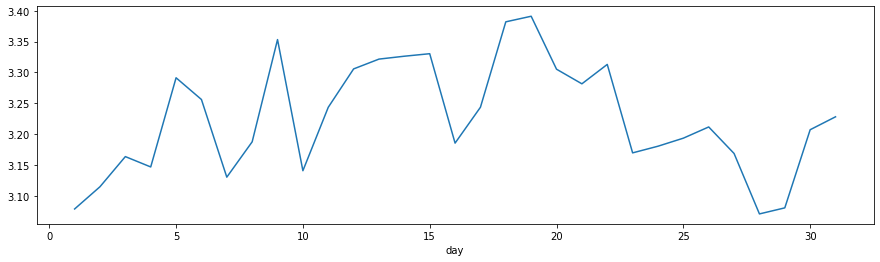

In [20]:
display(df_ecom[:'2020-01-01'].groupby('day').mean() / df_ecom[:'2020-01-01'].groupby('day').mean().sum(axis=0) * 100)
(df_ecom[:'2020-01-01'].groupby('day').mean() / df_ecom[:'2020-01-01'].groupby('day').mean().sum(axis=0) * 100)['Total'].plot()

In [21]:
df_month = df_ecom.resample('M').sum()
df_month['month'] = df_month.index.month
df_month.head()

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week,day,month
2016-12-31,1300523,80541,3953837,7174689,14284867,26794457,96,496,12
2017-01-31,1300523,80543,3953841,7174690,14284871,26794468,91,496,1
2017-02-28,1300524,80545,3953840,7174690,14284870,26794469,84,406,2
2017-03-31,1496852,86777,3573724,9045476,15786871,29989700,93,496,3
2017-04-30,1441006,84253,3319387,9188977,16048746,30082369,95,465,4


In [22]:
df_month[:'2020-01-01'].groupby('month').mean() / df_month[:'2020-01-01'].groupby('month').mean().sum(axis=0) * 100

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week,day
month,,,,,,,,
1,8.021974,7.631694,8.134154,8.154389,7.806560,7.917117,8.161401,8.644127
2,8.419491,8.408856,8.168523,8.488060,8.055825,8.212440,7.674153,7.075636
3,7.885481,7.437768,9.182318,8.725906,7.756805,8.095138,8.770461,8.644127
4,7.282336,7.547935,8.751383,8.693676,7.869654,8.072421,8.222307,8.103869
5,7.889860,7.224926,8.965688,8.641110,8.218576,8.289240,8.222307,8.644127
6,7.028840,6.631929,7.579543,8.744087,8.445110,8.193365,8.496384,8.103869
7,7.167615,6.129185,7.730584,8.386127,8.517646,8.142272,8.313666,8.644127
8,7.617829,6.839933,7.924473,8.485326,8.766385,8.400766,8.496384,8.644127
9,7.507496,6.614784,7.758450,8.230165,8.267364,8.035039,8.465931,8.103869


<AxesSubplot:xlabel='month'>

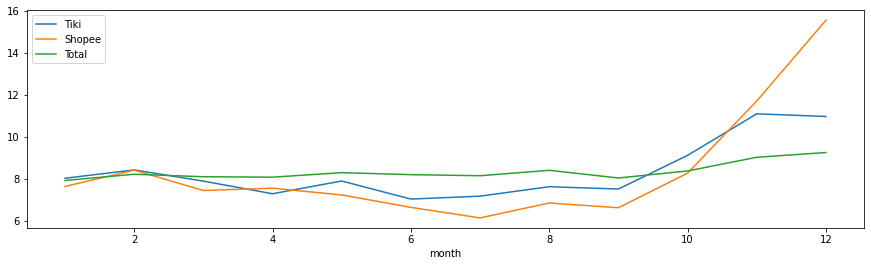

In [23]:
(df_month[:'2020-01-01'].groupby('month').mean() / df_month[:'2020-01-01'].groupby('month').mean().sum(axis=0) * 100)[['Tiki', 'Shopee', 'Total']].plot()

In [25]:
df_month.groupby('month').mean() / df_month.groupby('month').mean().sum(axis=0) * 100

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week,day
month,,,,,,,,
1,8.653963,6.897529,8.499228,7.931810,7.774022,7.724778,8.399142,8.635398
2,9.210071,7.595984,8.162211,7.870538,7.997693,8.014325,7.760077,7.169470
3,7.815498,7.702594,9.286042,7.691633,7.877084,7.924023,8.508696,8.635398
4,8.139539,8.998357,8.647187,7.586310,8.126436,8.319146,8.216552,8.095686
5,8.406271,8.095223,9.777977,8.195483,8.360352,8.398702,8.472178,8.635398
6,8.657599,8.707034,9.079167,8.627153,8.593784,8.674069,8.234811,8.095686
7,8.125412,9.781843,8.629948,8.847577,8.995608,9.055357,8.435660,8.635398
8,8.152166,9.610688,8.035480,9.209550,9.253573,9.124434,8.490437,8.635398
9,8.165654,10.048929,7.129896,8.767073,9.340954,9.138204,8.289588,8.095686


<AxesSubplot:xlabel='month'>

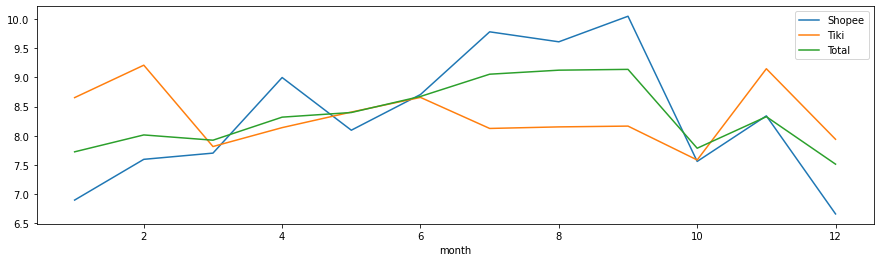

In [26]:
(df_month.groupby('month').mean() / df_month.groupby('month').mean().sum(axis=0) * 100)[['Shopee', 'Tiki', 'Total']].plot()

# Seasonal Decomposition

1. Classical seasonal decomposition

Do with overall data and data from 2020

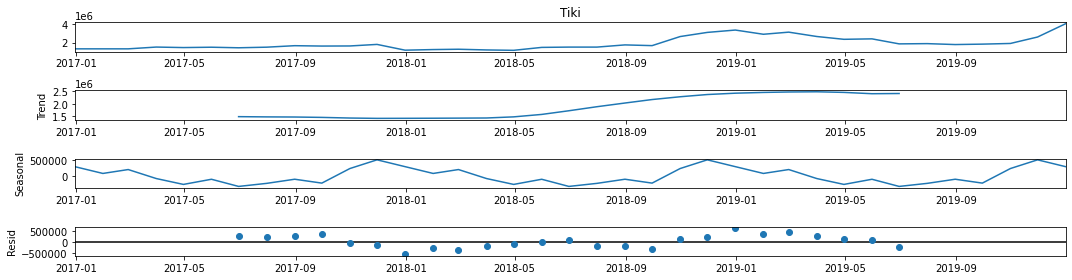

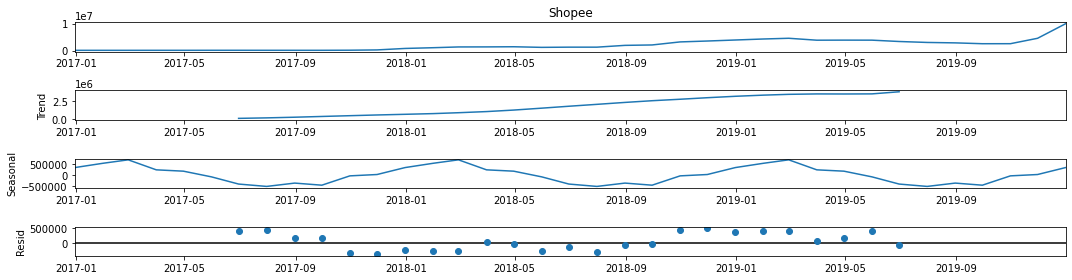

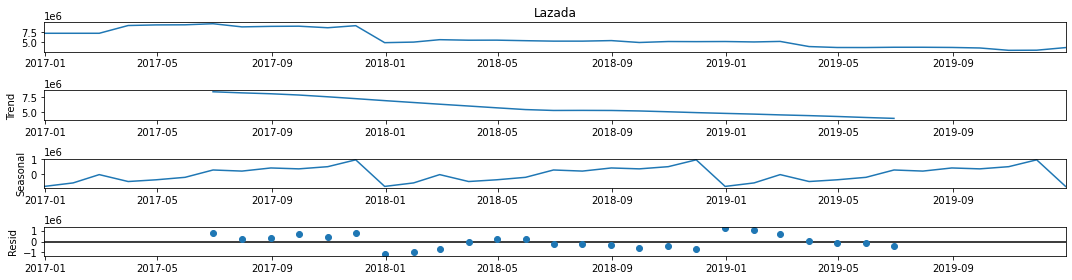

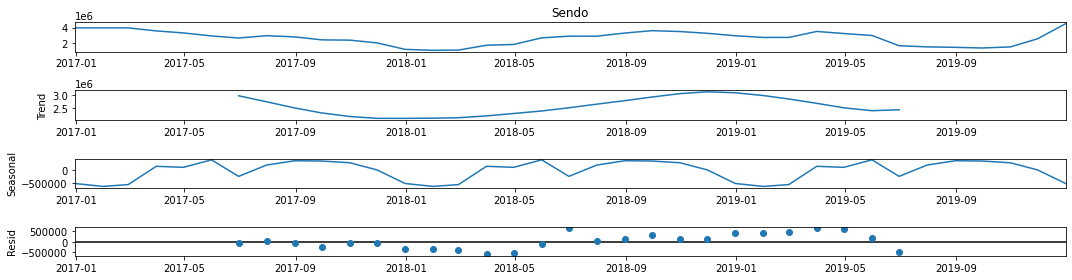

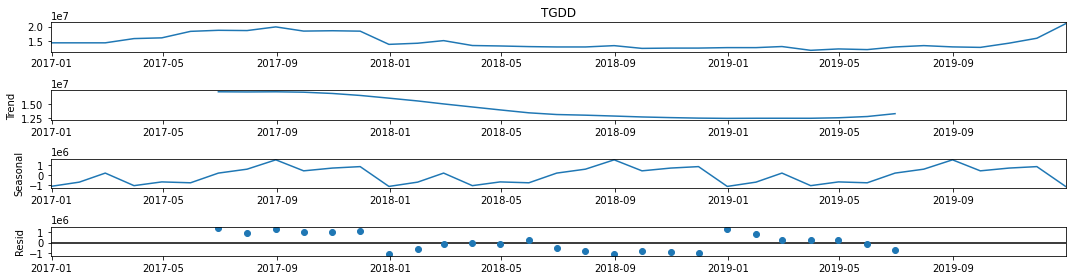

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df_month[:'2020-01-01']['Tiki']).plot()
seasonal_decompose(df_month[:'2020-01-01']['Shopee']).plot()
seasonal_decompose(df_month[:'2020-01-01']['Lazada']).plot()
seasonal_decompose(df_month[:'2020-01-01']['Sendo']).plot()
seasonal_decompose(df_month[:'2020-01-01']['TGDD']).plot()
plt.show()

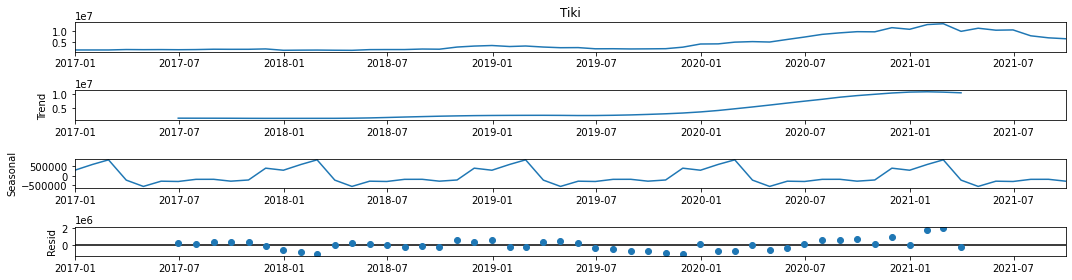

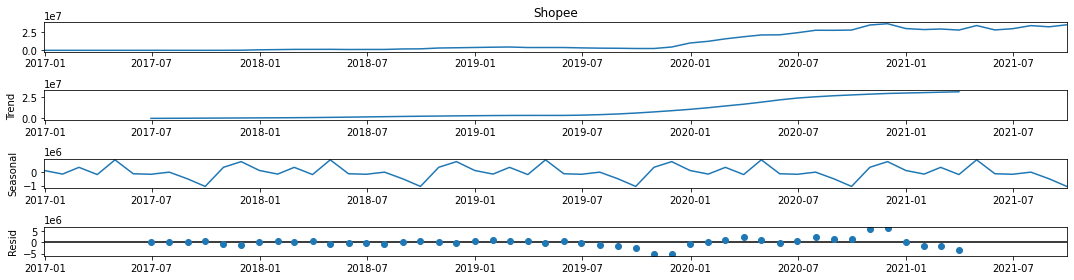

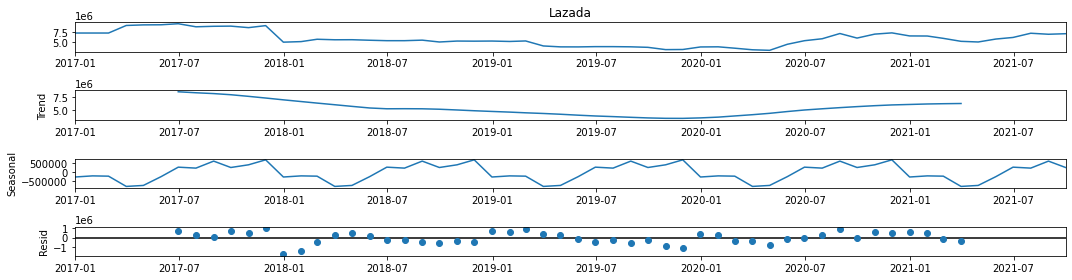

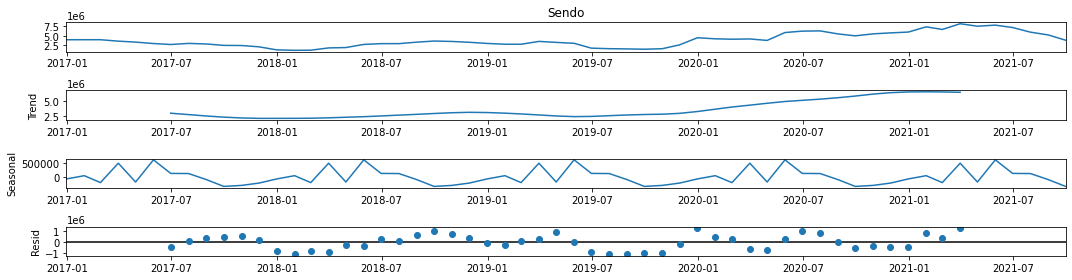

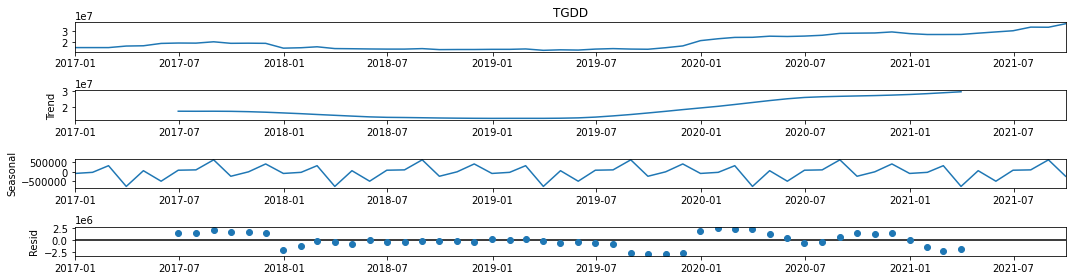

In [28]:
seasonal_decompose(df_month['Tiki']).plot()
seasonal_decompose(df_month['Shopee']).plot()
seasonal_decompose(df_month['Lazada']).plot()
seasonal_decompose(df_month['Sendo']).plot()
seasonal_decompose(df_month['TGDD']).plot()
plt.show()

2. STL (Seasonal-Trend decomposition using Loses)

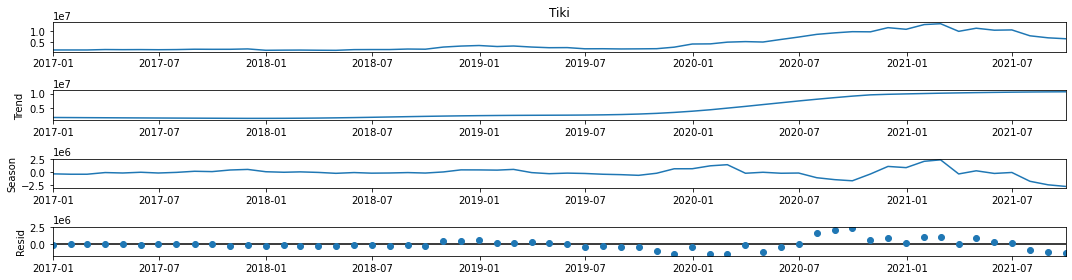

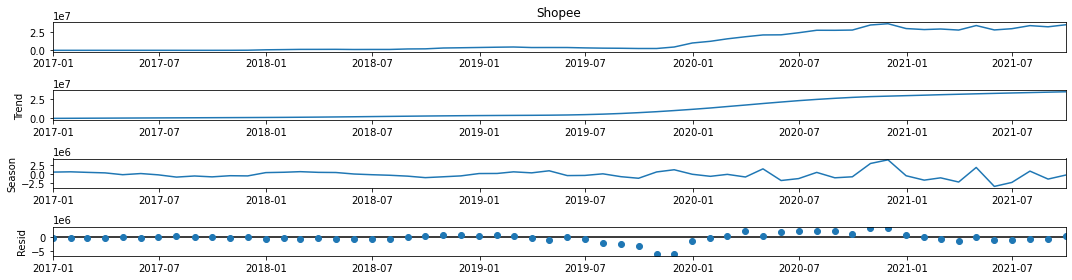

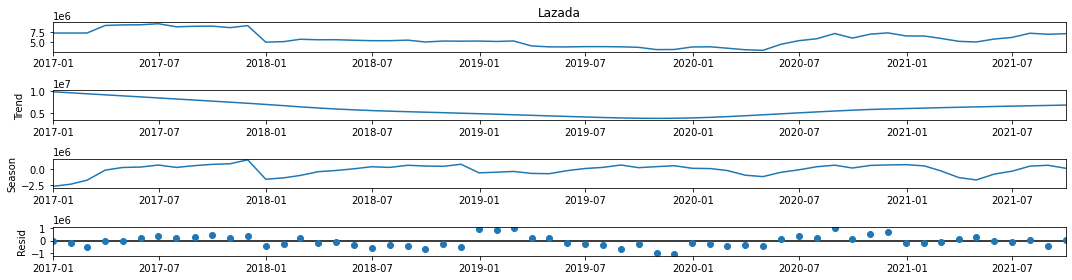

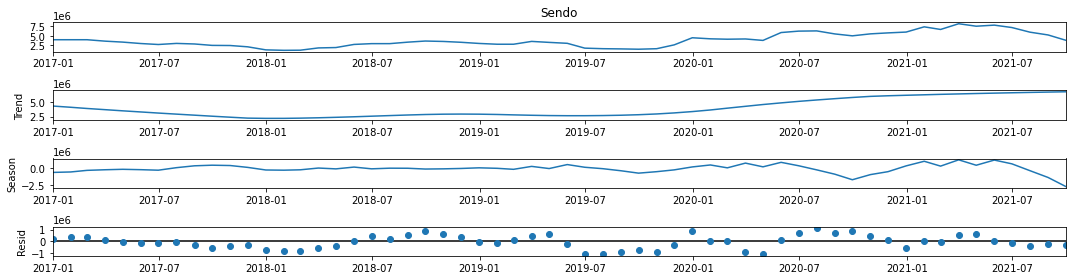

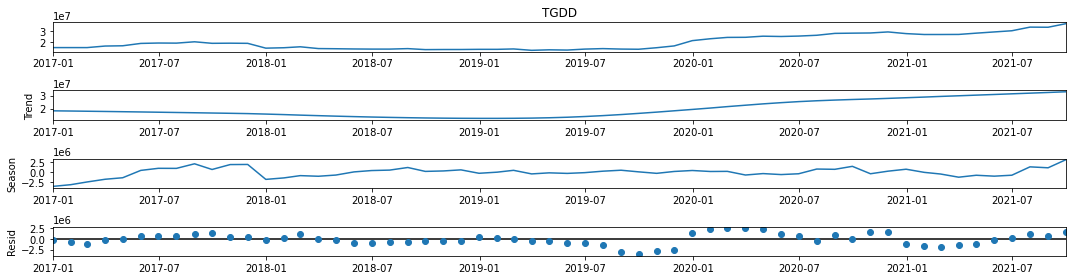

In [36]:
from statsmodels.tsa.seasonal import STL

STL(df_month['Tiki'], period=12).fit().plot()
STL(df_month['Shopee'], period=12).fit().plot()
STL(df_month['Lazada'], period=12).fit().plot()
STL(df_month['Sendo'], period=12).fit().plot()
STL(df_month['TGDD'], period=12).fit().plot()
plt.show()

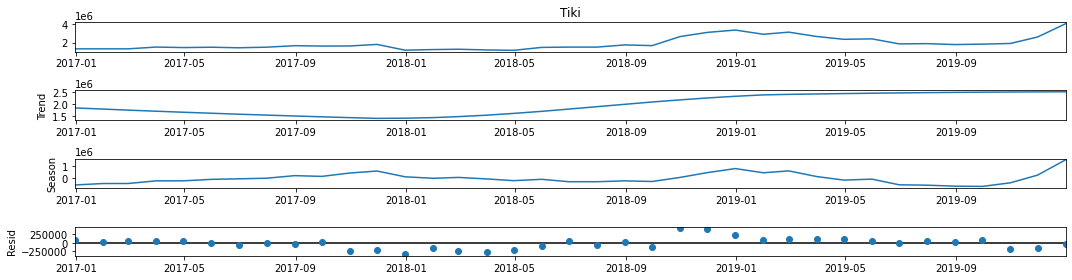

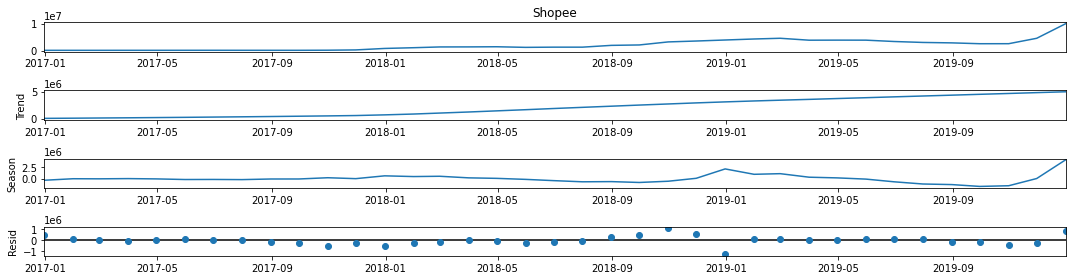

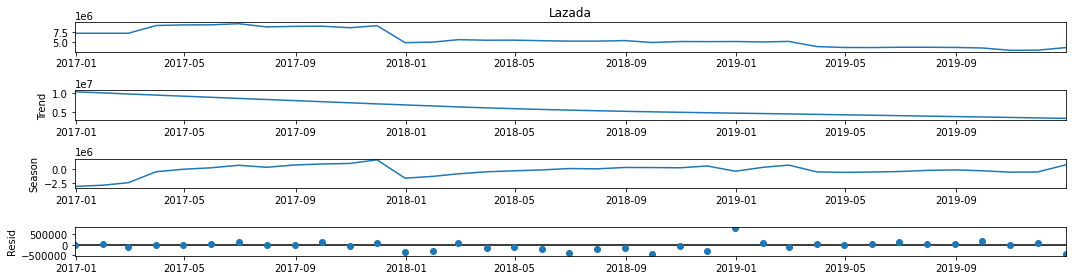

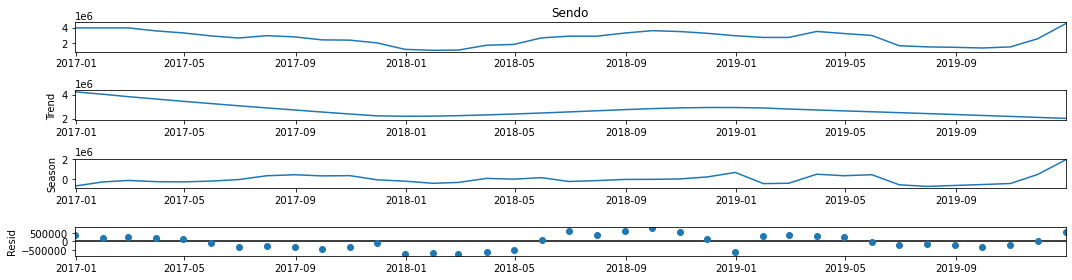

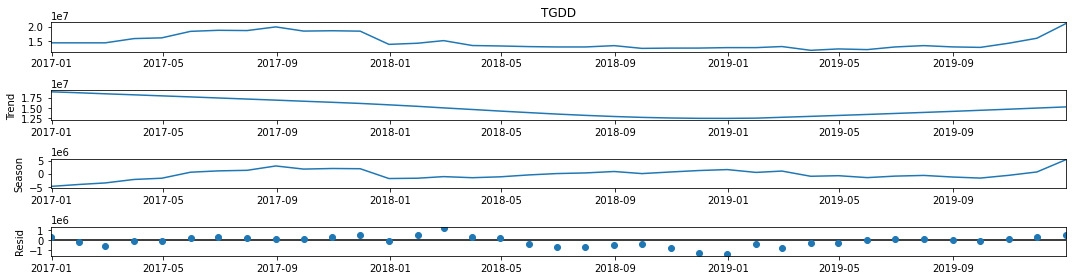

In [38]:
from statsmodels.tsa.seasonal import STL

STL(df_month[:'2020-01-01']['Tiki'], period=12).fit().plot()
STL(df_month[:'2020-01-01']['Shopee'], period=12).fit().plot()
STL(df_month[:'2020-01-01']['Lazada'], period=12).fit().plot()
STL(df_month[:'2020-01-01']['Sendo'], period=12).fit().plot()
STL(df_month[:'2020-01-01']['TGDD'], period=12).fit().plot()
plt.show()

In [40]:
STL(df_month[:'2020-01-01']['Tiki'], period=12).fit().seasonal

2016-12-31   -6.389063e+05
2017-01-31   -5.108760e+05
2017-02-28   -5.073974e+05
2017-03-31   -2.711258e+05
2017-04-30   -2.700689e+05
2017-05-31   -1.387982e+05
2017-06-30   -9.350106e+04
2017-07-31   -3.907595e+04
2017-08-31    1.888788e+05
2017-09-30    1.229074e+05
2017-10-31    4.215486e+05
2017-11-30    5.991017e+05
2017-12-31    8.651849e+04
2018-01-31   -4.636726e+04
2018-02-28    3.179844e+04
2018-03-31   -1.019802e+05
2018-04-30   -2.550440e+05
2018-05-31   -1.358773e+05
2018-06-30   -3.498750e+05
2018-07-31   -3.500071e+05
2018-08-31   -2.733742e+05
2018-09-30   -3.291870e+05
2018-10-31    3.201705e+04
2018-11-30    4.561970e+05
2018-12-31    8.152849e+05
2019-01-31    4.419176e+05
2019-02-28    6.105220e+05
2019-03-31    1.073761e+05
2019-04-30   -2.063975e+05
2019-05-31   -1.208591e+05
2019-06-30   -6.219943e+05
2019-07-31   -6.576101e+05
2019-08-31   -7.440393e+05
2019-09-30   -7.668021e+05
2019-10-31   -4.458768e+05
2019-11-30    2.339806e+05
2019-12-31    1.590718e+06
F